In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from datetime import datetime

In [14]:
# Choose city:
city = 'New York'

# Choose starting hour and number of hour to look at/graph
starting_hour = 1
hour = 168             #choose number of hours to graph

# Choose building id
building_id = 5

# Read resstock results summary folder:
B = list(range(400))
if city == 'Detroit':
    load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\400_Buildings_EB\\Detroit\\'
else:
    load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\400_Buildings_EB\\LA_NYC_ORL_SEA_ATL_MIN_PHX\\'

resstock_results = pd.read_csv(load_folder + 'results.csv')
resstock_results = resstock_results[resstock_results['building_characteristics_report.location_city'].str.contains(city) == True]
resstock_results = resstock_results.sort_values(by='build_existing_model.building_id')
resstock_results['build_existing_model.building_id'] = resstock_results['build_existing_model.building_id'] % 400
resstock_results.loc[resstock_results['build_existing_model.building_id'] ==0, 'build_existing_model.building_id'] = 400
resstock_results = resstock_results.reset_index()
resstock_results = resstock_results.drop(['index'], axis=1)

resstock_building_id = building_id

folder_id = resstock_results.loc[resstock_results['build_existing_model.building_id'] == resstock_building_id, '_id']
folder_id = folder_id.reset_index()
folder_id = folder_id.drop(['index'], axis=1)
folder_id = folder_id.iloc[0,0]

archive = zipfile.ZipFile(load_folder + folder_id + '\\' + 'data_point.zip')

load_data_path = archive.extract('enduse_timeseries.csv', load_folder + folder_id + '\\')
load_data_raw = pd.read_csv(load_data_path)
archive.close()

# Hourly load
load_data_annual = load_data_raw['total_site_electricity_kwh']
load_data_annual = load_data_annual.iloc[starting_hour:starting_hour+hour]
load_data_annual = load_data_annual.reset_index()
load_data_annual = load_data_annual.drop(['index'], axis=1)
load_data_annual['hour'] = load_data_annual.index + 1

idxmax, valmax = load_data_annual['total_site_electricity_kwh'].agg(['idxmax', 'max'])

load_data_annual
idxmax

126.0

(1.0, 168.0)

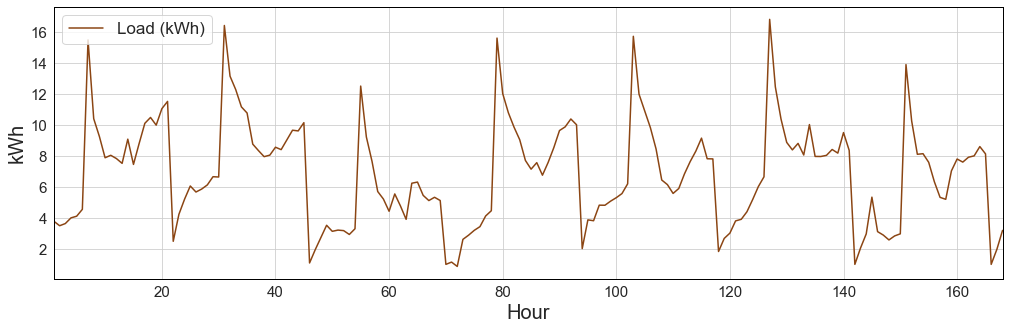

In [15]:
# Graph the load:
fig, ax = plt.subplots(figsize=(17,5))
plt.plot(load_data_annual['hour'], load_data_annual['total_site_electricity_kwh'], label = "Load (kWh)", color='saddlebrown')
plt.legend(loc='upper left', fontsize=17)
plt.xlabel("Hour",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("kWh", fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.xlim(load_data_annual['hour'].min(),load_data_annual['hour'].max())